In [1]:
import sys
import os
from os.path import join, exists, abspath
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import scipy
from scipy.stats import ttest_1samp, pearsonr
from scipy.spatial.distance import squareform
import h5py
import seaborn as sns

from tqdm import tqdm

In [2]:
import warnings

In [3]:
import nibabel as nb
from nilearn import plotting
from nipype.interfaces import fsl

In [4]:
dir_current = os.getcwd().replace('\\','/')

tmp = dir_current.split('/')
idx = [ii for ii, s in enumerate(tmp) if s=='github'][0]

dir_git = '/'.join(tmp[:idx+1])
dir_git

'D:/mobaxterm/sungbeenpark/github'

In [5]:
path_module = abspath(join(dir_git,'nitools'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import nitools as nt

added the path, D:\mobaxterm\sungbeenpark\github\nitools


In [6]:
path_module = abspath(join(dir_git,'SUITPy'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import SUITPy as suit

added the path, D:\mobaxterm\sungbeenpark\github\SUITPy


In [7]:
path_module = abspath(dir_git)
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import surfAnalysisPy as surf

added the path, D:\mobaxterm\sungbeenpark\github


In [8]:
path_module = abspath(join(dir_git,'PcmPy'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import PcmPy as pcm

added the path, D:\mobaxterm\sungbeenpark\github\PcmPy


---

In [9]:
dir_work = dir_current
dir_atlas = join(dir_work,'fs_LR_32k')
dir_atlas

'D:/mobaxterm/sungbeenpark/github/SeqSpatialSupp_fMRI/atlas\\fs_LR_32k'

---

## ROIs

### - Atlas

In [10]:
dir_atlas = join(dir_git,'SeqSpatialSupp_fMRI/atlas/fs_LR_32k')
exists(dir_atlas)

True

In [11]:
underlay = join(dir_atlas,'fs_LR.32k.LR.sulc.dscalar.gii')
border = join(dir_git,'surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border')

In [12]:
def gifti_to_cmap(label_img):
    if isinstance(label_img, str):
        label_img = nb.load(label_img)
    if not isinstance(label_img, nb.gifti.gifti.GiftiImage):
        raise TypeError("Expected 'gifti' file")

    labels = label_img.labeltable.labels
    rgba = np.zeros((len(labels),4))
    for i,label in enumerate(labels):
        rgba[i,] = labels[i].rgba
    
    cmap = colors.ListedColormap(rgba, N=len(rgba))

    return cmap

i) Glasser_2016

In [13]:
data = nb.load(join(dir_atlas,'Glasser_2016.32k.L.label.gii'))
tmp = np.unique(data.darrays[0].data)
print(len(tmp), tmp)

cmap = gifti_to_cmap(data)

181 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180]


<Axes: >

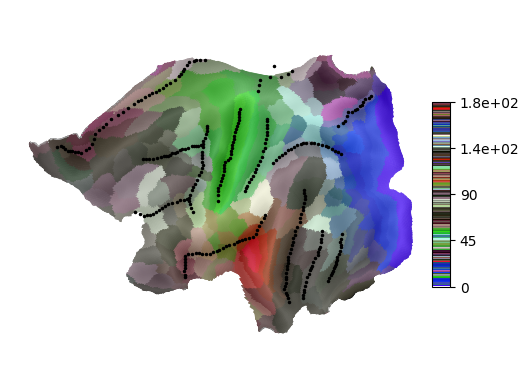

In [14]:
surf.plot.plotmap(
    data=data,
    surf='fs32k_L',
    underlay=underlay, alpha=0.7, cmap=cmap, colorbar=True,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)

ii) Brodmann

In [15]:
data = nb.load(join(dir_atlas,'ROI.32k.L.label.gii'))
tmp = np.unique(data.darrays[0].data)
print(len(tmp), tmp)

cmap = gifti_to_cmap(data)

9 [0 1 2 3 4 5 6 7 8]


<Axes: >

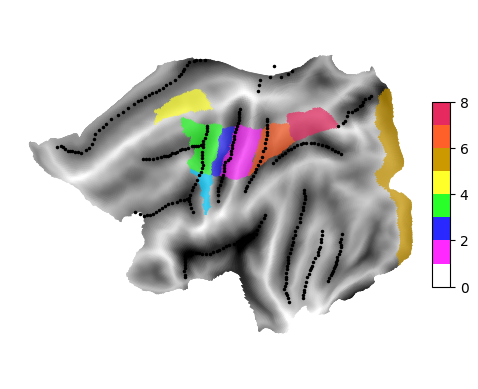

In [16]:
surf.plot.plotmap(
    data=data,
    surf='fs32k_L',
    underlay=underlay, alpha=0.7, cmap=cmap, colorbar=True,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)

iii) SSS

In [17]:
list_roi = ['SMA', 'PMv', 'PMd', 'M1', 'S1', 'SPLa', 'SPLp', 'DSVC', 'MT+', 'VSVC', 'EAC']

In [18]:
data = nb.load(join(dir_atlas,'ROI.L.SSS.label.gii'))
tmp = np.unique(data.darrays[0].data)
print(len(tmp), tmp)

cmap = gifti_to_cmap(data)

12 [ 0  1  2  3  4  5  6  7  8  9 10 11]


<Axes: >

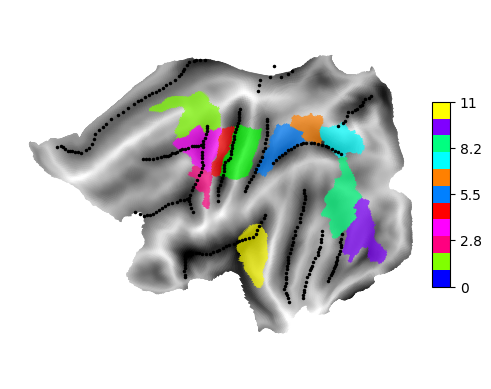

In [19]:
surf.plot.plotmap(
    data=data,
    surf='fs32k_L',
    underlay=underlay, alpha=0.7, cmap=cmap, colorbar=True,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)

---